In [1]:
import sys
sys.path.append('./RECOTOOLS/')
# import project_metadata
from core import system_run, survey_metadata, run_collection
import datalibrary
import processor
import systems.pelisystem
import numpy as np

# Select desired entries - can choose to only use measurements with above a particular exposure or muon count etc.

metadata_survey     = survey_metadata("./metadata.csv", 
                           selection=(lambda meta: (meta.POS > 0) & (meta.POS < 3000) & (meta.DF != "") &
                                       (meta.COUNT > 0) & (meta.EXP > 600) & (meta.TYPE=="TUNNEL")) )

survey     = run_collection(metadata_survey)


Prepared 0/28
<module 'systems.pelisystem' from '/home/cresta/tunnel_processing_example/./RECOTOOLS/systems/pelisystem.py'>
Prepared 1/28
<module 'systems.pelisystem' from '/home/cresta/tunnel_processing_example/./RECOTOOLS/systems/pelisystem.py'>
Prepared 2/28
<module 'systems.pelisystem' from '/home/cresta/tunnel_processing_example/./RECOTOOLS/systems/pelisystem.py'>
Prepared 3/28
<module 'systems.pelisystem' from '/home/cresta/tunnel_processing_example/./RECOTOOLS/systems/pelisystem.py'>
Prepared 4/28
<module 'systems.pelisystem' from '/home/cresta/tunnel_processing_example/./RECOTOOLS/systems/pelisystem.py'>
Prepared 5/28
<module 'systems.pelisystem' from '/home/cresta/tunnel_processing_example/./RECOTOOLS/systems/pelisystem.py'>
Prepared 6/28
<module 'systems.pelisystem' from '/home/cresta/tunnel_processing_example/./RECOTOOLS/systems/pelisystem.py'>
Prepared 7/28
<module 'systems.pelisystem' from '/home/cresta/tunnel_processing_example/./RECOTOOLS/systems/pelisystem.py'>
Prepared

In [2]:


keylist = []
for key in systems.pelisystem.get_system_features():
    keylist.append(key)
for key in survey._runs[0].META.keys():
    if "Unnamed" not in key:
        keylist.append(str(key))
#print(keylist)

survey.reset_feature_cache()

frame_survey = survey[keylist]


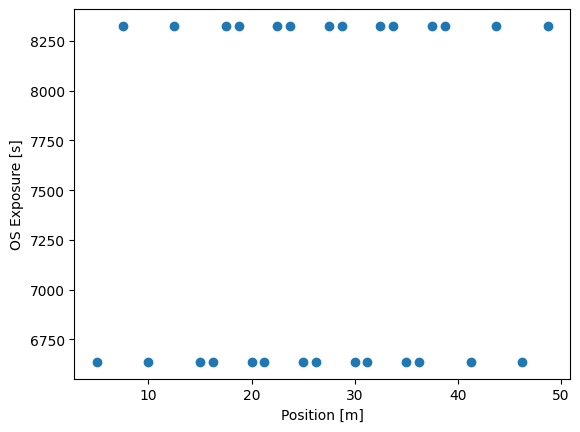

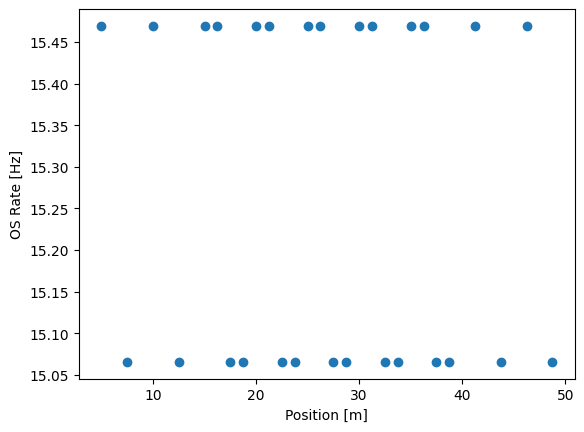

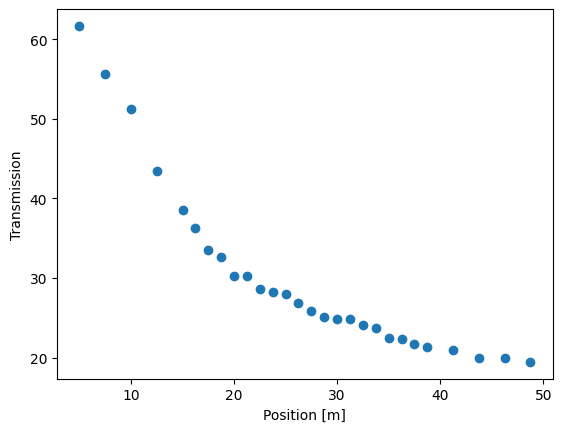

/tmp/ipykernel_70122/939867241.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sf[f"pixel_trans:{pixelid}"] = sf[f"pixel:{pixelid}"]/sf[f"ospixel:{pixelid}"]
/tmp/ipykernel_70122/939867241.py:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sf[f"pixel_transerr:{pixelid}"] = sf[f"pixel_trans:{pixelid}"]*np.sqrt( (e1)**2 + (e2)**2 )
/tmp/ipykernel_70122/939867241.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider j

In [3]:
# Read in pixel lookup tables
pixel_lookup = systems.pelisystem.load_system_lookup({'BTO':0.05})

# Work through the simulation featurelist 
sf = frame_survey

import matplotlib.pyplot as plt

# Calculate total rate and transmission
sf["rate"] = sf["count"]/sf["exposure"]
sf["os_rate"] = sf["os_count"]/sf["os_exposure"]
sf["rateerr"] = np.sqrt(sf["count"])/sf["exposure"]
sf["os_rateerr"] = np.sqrt(sf["os_count"])/sf["os_exposure"]

sf["trans"] = 100*sf["rate"]/sf["os_rate"]

e1 = sf["rateerr"]/sf["rate"]
e2 = sf["os_rateerr"]/sf["os_rate"]
sf["transerr"] = sf["trans"]*np.sqrt( e1**2 + e2**2 )

plt.scatter( sf["POS"], sf["os_exposure"] )
plt.xlabel("Position [m]")
plt.ylabel("OS Exposure [s]")
plt.show()

plt.scatter( sf["POS"], sf["os_rate"] )
plt.xlabel("Position [m]")
plt.ylabel("OS Rate [Hz]")
plt.show()

plt.scatter( sf["POS"], sf["trans"] )
plt.xlabel("Position [m]")
plt.ylabel("Transmission")
plt.show()

# Work through pixel list in pelisystem
for pixel in systems.pelisystem.pixel_list:
    pixelid = ','.join(map(str, pixel))   


    sf[f"pixel_rateerr:{pixelid}"] = np.sqrt(sf[f"pixel:{pixelid}"]*sf["exposure"]) / sf["exposure"]
    sf[f"ospixel_rateerr:{pixelid}"] = np.sqrt(sf[f"ospixel:{pixelid}"]*sf["exposure"]) / sf["exposure"]

    # Get transmission
    sf[f"pixel_trans:{pixelid}"] = sf[f"pixel:{pixelid}"]/sf[f"ospixel:{pixelid}"]

    # Get error on transmission
    e1 = sf[f"pixel_rateerr:{pixelid}"]/sf[f"pixel:{pixelid}"]
    e2 = sf[f"ospixel_rateerr:{pixelid}"]/sf[f"ospixel:{pixelid}"]
    sf[f"pixel_transerr:{pixelid}"] = sf[f"pixel_trans:{pixelid}"]*np.sqrt( (e1)**2 + (e2)**2 )

 

frame_survey.to_csv("INTERMEDIATE/metadata_featurelist.csv")